In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import decomposition

In [2]:
from zipfile import ZipFile
file_name = "orl_faces.zip"
with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print("Done")

Done


In [3]:
train = pd.DataFrame()
for s in range(1,41):
    for i in range(1,11,2):
        img=Image.open("orl_faces" + os.sep + 's' + str(s) + os.sep + str(i)+".pgm")
        imgarray=np.array(img).reshape(1,(92*112))
        train = train.append(pd.DataFrame(imgarray , index = [str(s)])) 
#print(train)

In [0]:
test = pd.DataFrame()
for s in range(1,41):
    for i in range(2,12,2):
        img=Image.open("orl_faces" + os.sep + 's' + str(s) + os.sep + str(i)+".pgm")
        imgarray=np.array(img).reshape(1,(92*112))
        test = test.append(pd.DataFrame(imgarray , index = [str(s)])) 
#print(test)

In [4]:
def PCA(D,alpha):
    number_of_rows = len(D.index)
    number_of_columns  = len(D.columns)
    D_mean = D.mean(axis = 0)
    Z = D - D_mean.T
    Cov = np.dot(Z.T,Z)/number_of_rows
    eig_value , eig_vector = np.linalg.eigh(Cov)
    sorting = eig_value.argsort();
    eig_value = eig_value[sorting[::-1]]
    eig_vector = eig_vector[:,sorting[::-1]]
    f = np.empty((number_of_columns,1))
    total_sum_eig = np.sum(eig_value)
    r_index = 0
    #print(len(eig_value))
    for r in range(0,number_of_columns):
        r_index += eig_value[r]
        f[r] = r_index / total_sum_eig        
    for r in range(0,number_of_columns):
        if(f[r] >= alpha):
            break
    r=r+1        
    #print("f = ",f)
    eig_vector = eig_vector[:,0:r]
    A = np.dot(eig_vector.T,D.T).T
    #A = pd.DataFrame(data = A,index = D.index)
    print("Reduction =" , r , "Dimention \nresult = \n",A)
    return A , eig_vector 
#PCA(train,0.85)

MemoryError: 

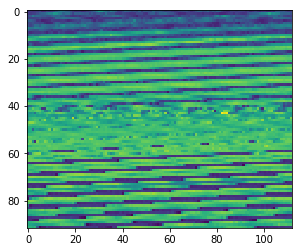

In [26]:
#pcaTrain1 ,eigVecPCA1= PCA(train,0.8)

#plt.imshow(pcaTrain1[0].reshape((6*6))
#plt.imshow(images[0])


In [6]:
pcaTrain2 ,eigVecPCA2= PCA(train,0.85)

10304
f =  [[0.18073435]
 [0.30674198]
 [0.37846696]
 ...
 [1.        ]
 [1.        ]
 [1.        ]]
Reduction = 51 Dimention 
result = 
               0             1            2            3            4   \
1    9149.058645   8259.501589 -1997.738180  -760.668000 -2938.486285   
1   10312.568132   7539.194191 -1123.521932 -1133.882277 -3374.542162   
1   11240.463085   7925.255052  -227.715084  1160.353487 -3089.973891   
1   10017.154245   7941.591329 -1299.944315  -146.134696 -3567.167942   
1   10358.403591   8275.274708  -493.644562  1727.286487 -2249.963487   
2    8522.060272   6435.592945 -1541.460798  -273.661411 -2583.602721   
2    8658.757433   6391.066316 -1502.911031  -749.462351 -2571.632118   
2    8538.269263   6650.064556 -1635.939614  -603.116295 -3147.691011   
2    9012.653003   6179.659866  -847.275597  -413.746354 -2616.084269   
2    8436.205767   5812.310812 -1291.553365 -1501.308695 -3184.434829   
3    7695.400882   7460.460566   345.859241 -1163.133371 -1

In [10]:
pcaTrain3 ,eigVecPCA3= PCA(train,0.9)

10304
f =  [[0.18073435]
 [0.30674198]
 [0.37846696]
 ...
 [1.        ]
 [1.        ]
 [1.        ]]
Reduction = 76 Dimention 
result = 
               0             1            2            3            4   \
1    9149.058645   8259.501589 -1997.738180  -760.668000 -2938.486285   
1   10312.568132   7539.194191 -1123.521932 -1133.882277 -3374.542162   
1   11240.463085   7925.255052  -227.715084  1160.353487 -3089.973891   
1   10017.154245   7941.591329 -1299.944315  -146.134696 -3567.167942   
1   10358.403591   8275.274708  -493.644562  1727.286487 -2249.963487   
2    8522.060272   6435.592945 -1541.460798  -273.661411 -2583.602721   
2    8658.757433   6391.066316 -1502.911031  -749.462351 -2571.632118   
2    8538.269263   6650.064556 -1635.939614  -603.116295 -3147.691011   
2    9012.653003   6179.659866  -847.275597  -413.746354 -2616.084269   
2    8436.205767   5812.310812 -1291.553365 -1501.308695 -3184.434829   
3    7695.400882   7460.460566   345.859241 -1163.133371 -1

In [7]:
pcaTrain4 ,eigVecPCA4= PCA(train,0.95)

10304
f =  [[0.18073435]
 [0.30674198]
 [0.37846696]
 ...
 [1.        ]
 [1.        ]
 [1.        ]]
Reduction = 115 Dimention 
result = 
              0             1            2            3            4    \
1    9149.058645   8259.501589 -1997.738180  -760.668000 -2938.486285   
1   10312.568132   7539.194191 -1123.521932 -1133.882277 -3374.542162   
1   11240.463085   7925.255052  -227.715084  1160.353487 -3089.973891   
1   10017.154245   7941.591329 -1299.944315  -146.134696 -3567.167942   
1   10358.403591   8275.274708  -493.644562  1727.286487 -2249.963487   
2    8522.060272   6435.592945 -1541.460798  -273.661411 -2583.602721   
2    8658.757433   6391.066316 -1502.911031  -749.462351 -2571.632118   
2    8538.269263   6650.064556 -1635.939614  -603.116295 -3147.691011   
2    9012.653003   6179.659866  -847.275597  -413.746354 -2616.084269   
2    8436.205767   5812.310812 -1291.553365 -1501.308695 -3184.434829   
3    7695.400882   7460.460566   345.859241 -1163.133371 -

In [0]:
def get_accuracy(pcaTrain,eigVecPCA):
  trainAccuracyPCA = np.empty((8,1))
  testAccuracyPCA = np.empty((8,1))
  for i in range(0,8):
    neigh = KNeighborsClassifier(n_neighbors=(i+1))
    neigh.fit(pcaTrain, train.index) 
    pcaTest = np.dot(test,eigVecPCA)
    pcaTrain = np.dot(train,eigVecPCA)
    testPredictPCA = neigh.predict(pcaTest)
    trainPredictPCA = neigh.predict(pcaTrain)
    trainAccuracyPCA[i] = metrics.accuracy_score(train.index,trainPredictPCA)
    testAccuracyPCA[i] = metrics.accuracy_score(train.index,testPredictPCA)

  return trainAccuracyPCA , testAccuracyPCA

In [24]:
trainAccuracyPCA1 , testAccuracyPCA1 = get_accuracy(pcaTrain1 , eigVecPCA1)
trainAccuracyPCA2 , testAccuracyPCA2 = get_accuracy(pcaTrain2 , eigVecPCA2)
trainAccuracyPCA3 , testAccuracyPCA3 = get_accuracy(pcaTrain3 , eigVecPCA3)
trainAccuracyPCA4 , testAccuracyPCA4 = get_accuracy(pcaTrain4 , eigVecPCA4)

print("Accuracy between Train and test of PCA @ alpha = 0.80")
for k in range(0,8):
  print("@k = " , (k+1) , " Training:", trainAccuracyPCA1[k], " , Testing PCA :" , testAccuracyPCA1[k])

print("Accuracy between Train and test of PCA @ alpha = 0.85")
for k in range(0,8):
  print("@k = " , (k+1) , "Training:", trainAccuracyPCA2[k], " , Testing PCA :" , testAccuracyPCA2[k])
  
print("Accuracy between Train and test of PCA @ alpha = 0.90")
for k in range(0,8):
  print("@k = " , (k+1) , "Training:", trainAccuracyPCA3[k], " , Testing PCA :" , testAccuracyPCA3[k])
  
print("Accuracy between Train and test of PCA @ alpha = 0.95")
for k in range(0,8):
  print("@k = " , (k+1) , "Training:", trainAccuracyPCA4[k], " , Testing PCA :" , testAccuracyPCA4[k])
  
 

Accuracy between Train and test of PCA @ alpha = 0.80
@k =  1  Training: [1.]  , Testing PCA : [0.95]
@k =  2  Training: [0.975]  , Testing PCA : [0.885]
@k =  3  Training: [0.965]  , Testing PCA : [0.9]
@k =  4  Training: [0.95]  , Testing PCA : [0.89]
@k =  5  Training: [0.915]  , Testing PCA : [0.87]
@k =  6  Training: [0.895]  , Testing PCA : [0.84]
@k =  7  Training: [0.87]  , Testing PCA : [0.805]
@k =  8  Training: [0.85]  , Testing PCA : [0.775]
Accuracy between Train and test of PCA @ alpha = 0.85
@k =  1 Training: [1.]  , Testing PCA : [0.95]
@k =  2 Training: [0.97]  , Testing PCA : [0.885]
@k =  3 Training: [0.97]  , Testing PCA : [0.905]
@k =  4 Training: [0.945]  , Testing PCA : [0.895]
@k =  5 Training: [0.925]  , Testing PCA : [0.855]
@k =  6 Training: [0.905]  , Testing PCA : [0.79]
@k =  7 Training: [0.895]  , Testing PCA : [0.775]
@k =  8 Training: [0.845]  , Testing PCA : [0.755]
Accuracy between Train and test of PCA @ alpha = 0.90
@k =  1 Training: [1.]  , Testing

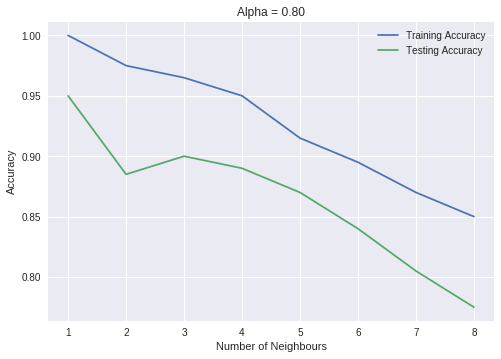

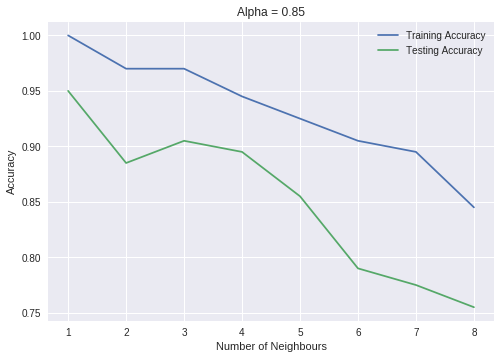

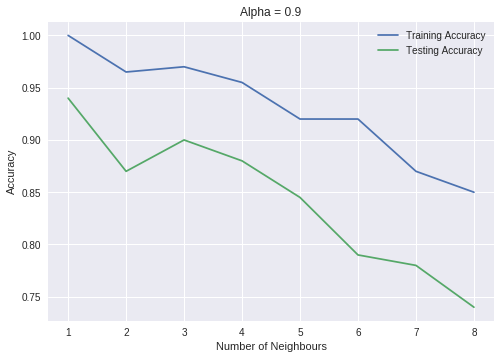

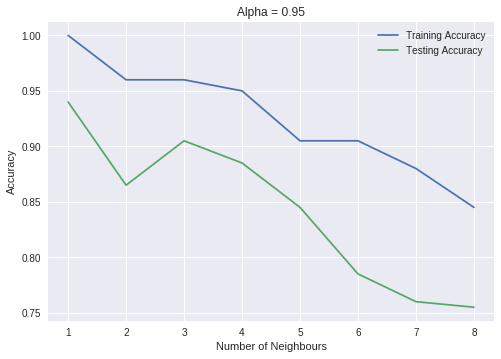

In [23]:
k = np.arange(1,9)
plt.plot(k,trainAccuracyPCA1)
plt.plot(k,testAccuracyPCA1)
plt.title("Alpha = 0.80")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Testing Accuracy"])
plt.show()

plt.plot(k,trainAccuracyPCA2)
plt.plot(k,testAccuracyPCA2)
plt.title("Alpha = 0.85")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Testing Accuracy"])
plt.show()

plt.plot(k,trainAccuracyPCA3)
plt.plot(k,testAccuracyPCA3)
plt.title("Alpha = 0.9")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Testing Accuracy"])
plt.show()

plt.plot(k,trainAccuracyPCA4)
plt.plot(k,testAccuracyPCA4)
plt.title("Alpha = 0.95")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Testing Accuracy"])
plt.show()



In [0]:
def LDA(D):
    number_of_columns  = len(D.columns)
    number_of_classes = len(set(D.index))
    Nk=5
    total_mean = D.mean()
    x = 0
    mean_class = np.empty((number_of_classes,number_of_columns))
    m = np.empty((number_of_classes,number_of_columns))
    for i in range(1,number_of_classes + 1):
        mean_class[x] = D.loc[str(i)].mean()
        x +=1
    y = 0
    for j in range(1,number_of_classes+1):
        m[y] = mean_class[y] - total_mean
        y +=1
    w=0
    B=0
    for z in range(1,number_of_classes+1):
        a = np.array([m[w]])
        B= B + (Nk * np.dot(np.transpose(a),a))
        w+=1
        
    Z = pd.DataFrame()  # 1st row as the column names
    for s in range(1,number_of_classes+1):
        Di = D.loc[str(s)]
        Z = Z.append((Di - Di.mean()))
        

    S =  (np.dot(np.transpose(Z),Z))
    
    S_inv = np.linalg.inv(S)

    W = np.dot(S_inv,B)
    eig_value , eig_vector = np.linalg.eigh(W)
    sorting = eig_value.argsort();
    eig_value = eig_value[sorting[::-1]]
    eig_vector = eig_vector[:,sorting[::-1]]
    
    Dimentions = 39
    eig_vec_reduction = eig_vector[:,0:Dimentions]
    result = np.dot(eig_vec_reduction.T,D.T).T
    result = pd.DataFrame(data = result,index = D.index)
    #print("Reduction =" , Dimentions , "Dimention \nresult = \n",result)
    return result,eig_vec_reduction 

In [0]:
ldaTrain , eigVecLDA = LDA(train)

In [30]:
trainAccuracyLDA = np.empty((8,1))
testAccuracyLDA = np.empty((8,1))
for i in range(0,8):
  neigh = KNeighborsClassifier(n_neighbors=(i+1))
  neigh.fit(ldaTrain, train.index)
  ldaTest = np.dot(test,eigVecLDA)
  ldaTrain = np.dot(train,eigVecLDA)
  testPredictLDA = neigh.predict(ldaTest)
  trainPredictLDA = neigh.predict(ldaTrain)
  trainAccuracyLDA[i] = metrics.accuracy_score(train.index,trainPredictLDA)
  testAccuracyLDA[i] = metrics.accuracy_score(train.index,testPredictLDA)
  
print("Accuracy between Train and test of LDA @ components = 39")
for k in range(0,8):
  print("@k = " , (k+1) , "Training:", trainAccuracyLDA[k], " , Testing LDA :" , testAccuracyLDA[k])

Accuracy between Train and test of LDA @ components = 39
@k =  1 Training: [1.]  , Testing LDA : [0.94]
@k =  2 Training: [0.955]  , Testing LDA : [0.88]
@k =  3 Training: [0.95]  , Testing LDA : [0.89]
@k =  4 Training: [0.94]  , Testing LDA : [0.87]
@k =  5 Training: [0.89]  , Testing LDA : [0.85]
@k =  6 Training: [0.855]  , Testing LDA : [0.805]
@k =  7 Training: [0.83]  , Testing LDA : [0.83]
@k =  8 Training: [0.805]  , Testing LDA : [0.785]


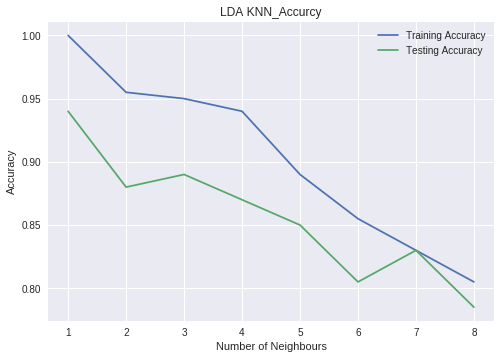

In [28]:
k = np.arange(1,9)
plt.plot(k,trainAccuracyLDA)
plt.plot(k,testAccuracyLDA)
plt.title("LDA KNN_Accurcy")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Testing Accuracy"])
plt.show()